<a href="https://colab.research.google.com/github/kvnptl/pytorch-practice/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

[1] My Github repo: https://github.com/kvnptl/pytorch-practice

[2] Reference Video: https://www.youtube.com/watch?v=Z_ikDlimN6A&t=83869s 

[3] Reference Book: https://www.learnpytorch.io/00_pytorch_fundamentals/#creating-tensors 



# Content

- Data (prepare and load)
- Build a model
- Fitting the data to model (training)
- Making prediction and evaluating a model (inference)
- Saving and loading model

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)

1.13.0+cu116


### Linear regression 

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# X = torch.arange(start, end, step).unsqueeze(dim=1)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], X.shape, len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), torch.Size([50, 1]), 50)

In [3]:
y[:10], y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), torch.Size([50, 1]))

#### Split the data

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(X_train), len(X_test)

(40, 10, 40, 10)

In [5]:
def plot_predictions (train_data=X_train, 
                      train_labels=y_train,
                      test_data = X_test,
                      test_labels=y_test,
                      predictions=None):
  '''
  Plot training data, test data, and compares predictions
  '''

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s= 4, label="Predictions")

  plt.legend(prop={"size":14})



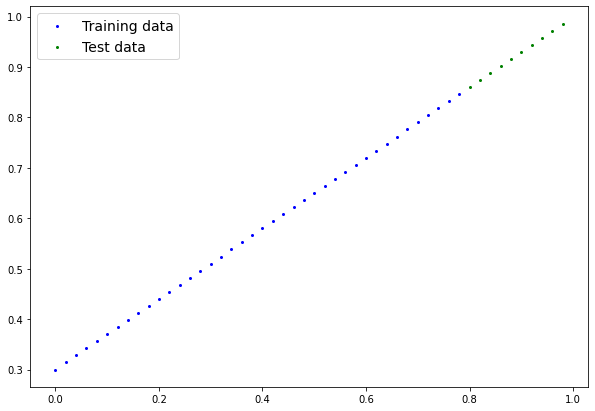

In [6]:
plot_predictions();

### Build a model

- `nn.Module` contains the larger building blocks (layers)

- `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make nn.Module(s))

- `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)

- `torch.optim` contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

In [7]:
class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherits from nn module
  
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
    return self.weights * x + self.bias



In [8]:
# torch.manual_seed(42)
torch.randn(1)

tensor([-0.6026])

In [9]:
# random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# original data
weight, bias

(0.7, 0.3)

#### PyTorch inference model - https://twitter.com/pytorch/status/1437838231505096708

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

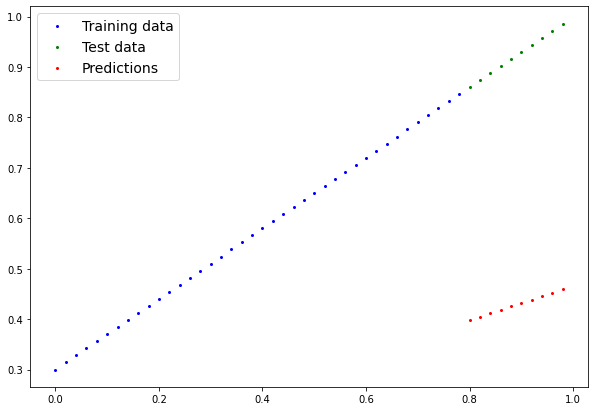

In [ ]:
plot_predictions(predictions=y_preds)

### Train model